# European option
Call option, put option, put-call parity

In [13]:
using PyPlot
using QuantEcon
using StatsFuns
using3D() # Required for projection="3d"

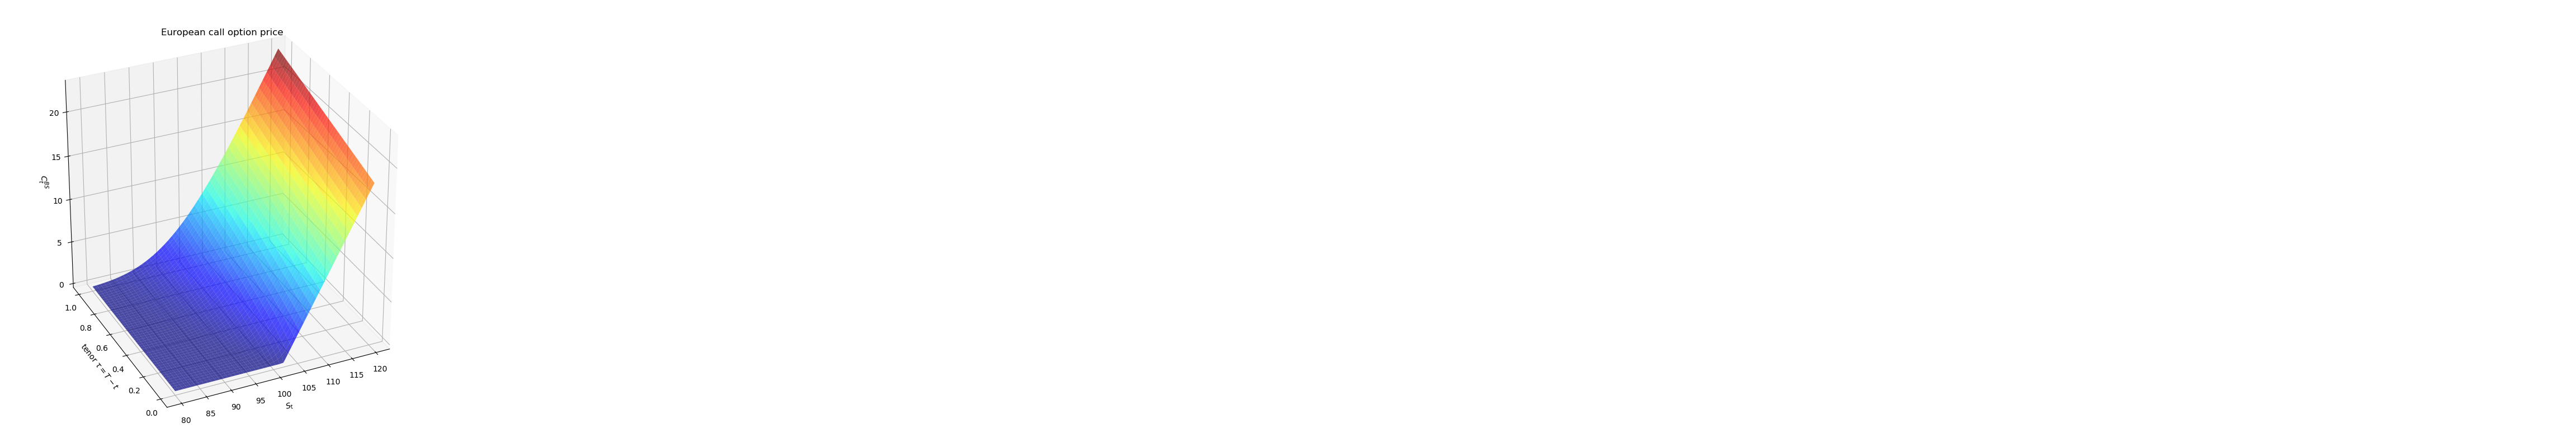

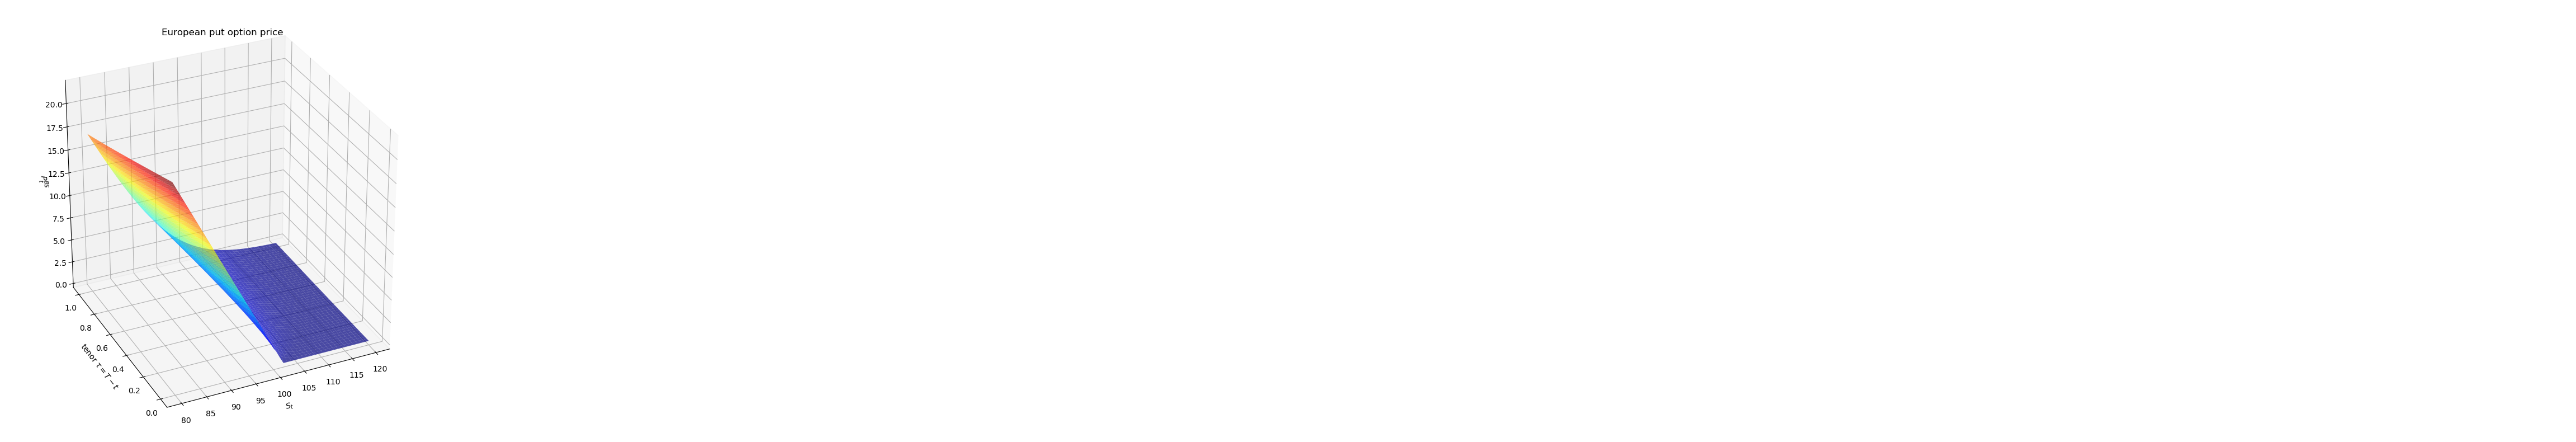

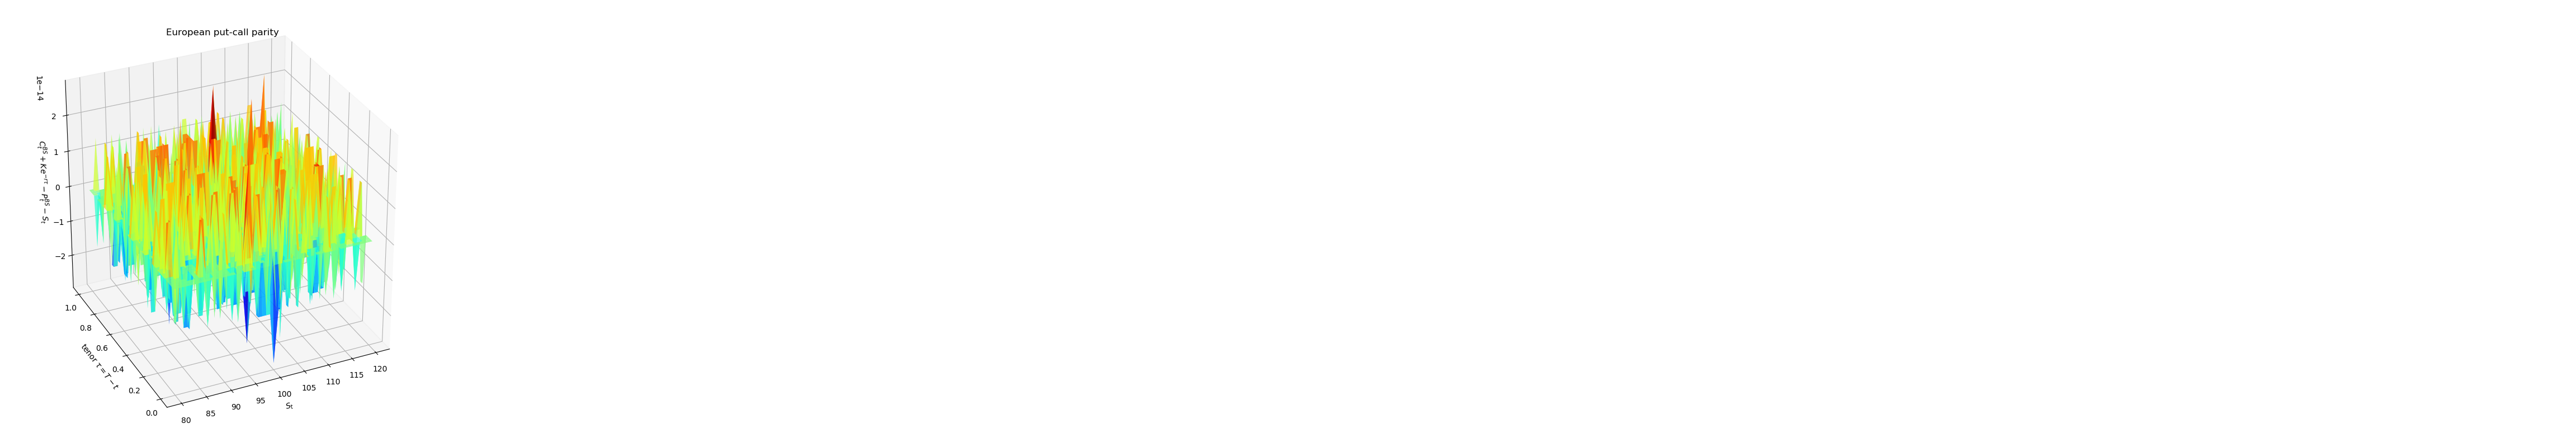

PyObject Text(-0.07913684303553484, 0.01440172764936566, '$C_t^{BS} + Ke^{-r\\tau} - P_t^{BS} - S_t$')

In [24]:
rd = 0.05
rf = 0
sigma = 0.1
ctime = 0
etime = 1
K = 102
Smin = 80
Smax = 120

MM = 50
tau = etime - ctime
Sval = linspace(Smin, Smax, MM)
tval = linspace(ctime, etime, MM)
Smat, tmat = meshgrid(Sval, tval)

C = zeros(MM, MM)
P = zeros(MM, MM)

ttau = etime - tmat
d1 = 1/sigma./sqrt.(ttau+10.0^-20).*(log.(Smat/K)+(rd-rf+sigma^2/2).*ttau)
d2 = d1 - sigma*sqrt.(ttau)
C = Smat .* exp.(-rf*ttau).*normcdf.(d1) - K * exp.(-rd*ttau).*normcdf.(d2)
P = K * exp.(-rd*ttau) .* normcdf.(-d2) - Smat .* exp.(-rf*ttau) .*normcdf.(-d1)
parity = C + K*exp.(-rd.*ttau) - P - Smat.*exp.(-rf*ttau)

#Figures
fig = figure("European call option price", figsize=(10,10))
ax = fig[:add_subplot](1,1,1, projection="3d")
ax[:plot_surface](Smat, ttau, C, cmap=ColorMap("jet"), alpha=0.7)
ax[:view_init](elev=30, azim=-115)

title("European call option price")
xlabel(L"$S_t$")
ylabel(L"$\mathrm{tenor}\ \tau=T-t$")
zlabel(L"$C_t^{BS}$")

fig = figure("European put option price", figsize=(10,10))
ax = fig[:add_subplot](1,1,1, projection="3d")
ax[:plot_surface](Smat, ttau, P, cmap=ColorMap("jet"), alpha=0.7)
ax[:view_init](elev=30, azim=-115)

title("European put option price")
xlabel(L"$S_t$")
ylabel(L"$\mathrm{tenor}\ \tau=T-t$")
zlabel(L"$P_t^{BS}$")

fig = figure("European put-call parity", figsize=(10,10))
ax = fig[:add_subplot](1,1,1, projection="3d")
ax[:plot_surface](Smat, ttau, parity, cmap=ColorMap("jet"), alpha=0.7)
ax[:view_init](elev=30, azim=-115)

title("European put-call parity")
xlabel(L"$S_t$")
ylabel(L"$\mathrm{tenor}\ \tau=T-t$")
zlabel(L"$C_t^{BS} + Ke^{-r\tau} - P_t^{BS} - S_t$")